In [1]:
# Load time-lapse.
from skimage.io import imread
time_mat = imread('/home/jiongyi/Documents/johnny/TIRF Candy Cane Raw Data and Kymographs/Candy Cane Raw Data/375_nM_tpm_4s_time_lapse.tif')
no_time_points, no_rows, no_columns = time_mat.shape

In [2]:
# Subtract background.
from skimage.morphology import white_tophat, rectangle
from numpy import stack, array
tophat_mat = stack(array([white_tophat(time_mat[i, :, :], selem = rectangle(3, 10)) for i in range(no_time_points)]), axis = 0)

In [100]:
# Blurr.
from skimage.filters import gaussian
blurred_mat = stack(array([gaussian(tophat_mat[i, :, :], sigma = (3, 1)) for i in range(no_time_points)]))

In [101]:
# Binarize.
from skimage.filters import threshold_li
from skimage.morphology import thin
from numpy import max
li_threshold = threshold_li(max(blurred_mat, axis = 0))
li_mat = stack(array([thin(blurred_mat[i, :, :] > li_threshold) for i in range(no_time_points)]), axis = 0)

In [102]:
# Save.
from skimage.io import imsave

from numpy import max
from skimage.util import img_as_uint
imsave('blurred_time.tif', img_as_uint(blurred_mat))
imsave('binarized_time.tif', img_as_uint(li_mat))

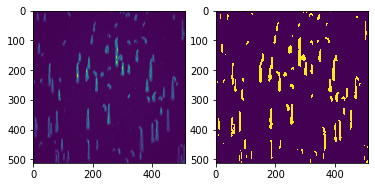

In [107]:
# Display.
%matplotlib inline
from matplotlib.pyplot import subplots
fig1_hand, axes1_hand = subplots(nrows = 1, ncols = 2)
axes1_hand[0].imshow(max(blurred_mat, axis = 0))
axes1_hand[1].imshow(max(blurred_mat, axis = 0) > 0.005)

In [149]:
from skimage.measure import label, regionprops
max_im = max(blurred_mat, axis = 0)
li_im = thin(max_im > threshold_li(max_im))
props_list = regionprops(label(li_im))

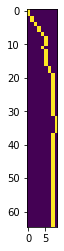

In [166]:
fig2_hand, axes2_hand = subplots()
axes2_hand.imshow(props_list[30].image)